<a href="https://colab.research.google.com/github/schizohub/PyTorch_lessons/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Thu Apr  6 17:05:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.0.0+cu118


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
cv_about = """Computer vision is the one of the main subsets or tasks in machine learning industry,
it is used mostly 3 big areas: 
Healthcare, Manufacturing and Self-driving cars
"""
print(cv_about)

Computer vision is the one of the main subsets or tasks in machine learning industry,
it is used mostly 3 big areas: 
Healthcare, Manufacturing and Self-driving cars



## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
import torch 
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [5]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
img, label = train_data[0]
# img, 
label

5

In [8]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [9]:
# train_data[0]

## 6. Visualize at least 5 different samples of the MNIST training dataset.

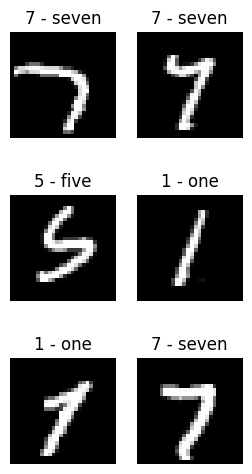

In [10]:
torch.manual_seed(42)
rows, cols= 3,2
def plot_MNIST(train_img, class_name):
    plt.imshow(train_img.squeeze(), cmap='gray')
    plt.axis(False)
    plt.title(class_name)


fig = plt.figure(figsize=(3,6))

for i in range(1, rows*cols+1):
    random_idx = torch.randint(1, len(train_data), size=[1]).item()
    # print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plot_MNIST(img,class_names[label])

In [11]:
train_data[0][0].shape

torch.Size([1, 28, 28])

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [12]:
from torch.utils.data import DataLoader 

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data, 
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [13]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fb039ab1a90>, <torch.utils.data.dataloader.DataLoader object at 0x7fb039ab1c10>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [14]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [15]:
from timeit import default_timer as timer 

def timer_fn(
    start: float,
    end: float,
    device: torch.device =None):
    total_time = end-start
    print(f"Total time of the process is {total_time:.3f} on the {device}")
    return total_time

In [16]:
class TinyVGGforMNISTV1(nn.Module):
    def __init__(self, input_features, hidden_units, output_features): 
        super().__init__()

        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_features,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.nn_classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_features)
        )

    def forward(self, x):
        return self.nn_classifier(self.conv_layer_2(self.conv_layer_1(x)))


In [17]:
len(class_names)

10

In [18]:
model_1 = TinyVGGforMNISTV1(input_features=1,
                          hidden_units=10,
                          output_features=len(class_names))
model_1

TinyVGGforMNISTV1(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (nn_classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.03)

In [20]:
train_data[0][0].shape

torch.Size([1, 28, 28])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [21]:
def train_loop(model:nn.Module,
               optimizer,
               loss_fn,
               accuracy_fn,
               train_dataloader,
               device='cpu'):
    train_loss, train_acc = 0,0
    model.train()

    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)

        train_loss+=loss
        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss/=len(train_dataloader)
    train_acc/=len(train_dataloader)

    print(f"Train loss: {train_loss:.4f}, Train_acc: {train_acc:.2f}")

def test_loop(model: nn.Module,
              optimizer,
              loss_fn:nn.Module,
              accuracy_fn,
              test_dataloader,
              device='cpu'):
    
    test_loss, test_acc = 0,0
    model.eval()

    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            X_test, y_test = X_test.to(device), y_test.to(device)

            test_preds = model(X_test)

            pred_loss = loss_fn(test_preds, y_test)

            test_loss += pred_loss
            test_acc += accuracy_fn(y_test, test_preds.argmax(dim=1))

        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)

        print(f"Test_loss: {test_loss:.4f}, Test_acc: {test_acc:.2f}")

In [22]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("Skip downloading this file!")
else:
    print("Downloading helper_functions.py...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", 'wb') as f:
        f.write(request.content)

Skip downloading this file!


In [23]:
from tqdm import tqdm
from helper_functions import accuracy_fn
start_time_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    train_loop(model=model_1,
               optimizer=optimizer,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               train_dataloader=train_dataloader)
    
    test_loop(model=model_1,
              optimizer=optimizer,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              test_dataloader=test_dataloader)

end_time_on_cpu = timer() 
time_on_model_1 = timer_fn(start=start_time_on_cpu, 
         end=end_time_on_cpu,
         device=str(next(model_1.parameters()).device))
time_on_model_1

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.8090, Train_acc: 70.82


 20%|██        | 1/5 [00:38<02:34, 38.57s/it]

Test_loss: 0.1047, Test_acc: 96.54
Epoch: 1
------
Train loss: 0.0919, Train_acc: 97.11


 40%|████      | 2/5 [01:15<01:52, 37.56s/it]

Test_loss: 0.0610, Test_acc: 98.00
Epoch: 2
------
Train loss: 0.0675, Train_acc: 97.87


 60%|██████    | 3/5 [01:50<01:12, 36.37s/it]

Test_loss: 0.0452, Test_acc: 98.39
Epoch: 3
------
Train loss: 0.0563, Train_acc: 98.25


 80%|████████  | 4/5 [02:29<00:37, 37.43s/it]

Test_loss: 0.0461, Test_acc: 98.61
Epoch: 4
------
Train loss: 0.0497, Train_acc: 98.50


100%|██████████| 5/5 [03:05<00:00, 37.02s/it]

Test_loss: 0.0450, Test_acc: 98.53
Total time of the process is 185.112 on the cpu


185.11226225500013

In [26]:
model1 = TinyVGGforMNISTV1(
    input_features=1,
    hidden_units=10,
    output_features=len(class_names)
).to(device)
optimizer_gpu = torch.optim.SGD(params=model1.parameters(), lr=0.03)

In [41]:
start_time_on_gpu = timer()

epochs = 20

for epoch in tqdm(range(epochs)):
    if epoch%5==0:
        print(f"Epoch: {epoch}\n------")

    train_loop(model=model1,
               optimizer=optimizer_gpu,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               train_dataloader=train_dataloader,
               device=device)
    
    test_loop(model=model1,
              optimizer=optimizer_gpu,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              test_dataloader=test_dataloader,
              device=device)

end_time_on_gpu = timer() 
time_on_model_1_1 = timer_fn(start=start_time_on_gpu, 
         end=end_time_on_gpu,
         device=str(next(model1.parameters()).device))
time_on_model_1_1

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.0492, Train_acc: 98.47


  5%|▌         | 1/20 [00:13<04:08, 13.09s/it]

Test_loss: 0.0437, Test_acc: 98.54
Train loss: 0.0447, Train_acc: 98.60


 10%|█         | 2/20 [00:26<03:56, 13.15s/it]

Test_loss: 0.0362, Test_acc: 98.75
Train loss: 0.0419, Train_acc: 98.63


 15%|█▌        | 3/20 [00:39<03:43, 13.17s/it]

Test_loss: 0.0430, Test_acc: 98.52
Train loss: 0.0394, Train_acc: 98.79


 20%|██        | 4/20 [00:54<03:39, 13.72s/it]

Test_loss: 0.0419, Test_acc: 98.63
Train loss: 0.0365, Train_acc: 98.84


 25%|██▌       | 5/20 [01:07<03:22, 13.50s/it]

Test_loss: 0.0437, Test_acc: 98.54
Epoch: 5
------
Train loss: 0.0344, Train_acc: 98.89


 30%|███       | 6/20 [01:20<03:08, 13.49s/it]

Test_loss: 0.0336, Test_acc: 98.81
Train loss: 0.0330, Train_acc: 98.97


 35%|███▌      | 7/20 [01:33<02:53, 13.36s/it]

Test_loss: 0.0368, Test_acc: 98.72
Train loss: 0.0316, Train_acc: 99.01


 40%|████      | 8/20 [01:47<02:42, 13.52s/it]

Test_loss: 0.0357, Test_acc: 98.76
Train loss: 0.0301, Train_acc: 99.03


 45%|████▌     | 9/20 [02:00<02:27, 13.39s/it]

Test_loss: 0.0363, Test_acc: 98.82
Train loss: 0.0285, Train_acc: 99.07


 50%|█████     | 10/20 [02:14<02:13, 13.37s/it]

Test_loss: 0.0416, Test_acc: 98.68
Epoch: 10
------
Train loss: 0.0268, Train_acc: 99.16


 55%|█████▌    | 11/20 [02:27<01:59, 13.26s/it]

Test_loss: 0.0376, Test_acc: 98.82
Train loss: 0.0255, Train_acc: 99.19


 60%|██████    | 12/20 [02:40<01:46, 13.36s/it]

Test_loss: 0.0337, Test_acc: 98.91
Train loss: 0.0250, Train_acc: 99.20


 65%|██████▌   | 13/20 [02:53<01:33, 13.30s/it]

Test_loss: 0.0346, Test_acc: 98.86
Train loss: 0.0233, Train_acc: 99.26


 70%|███████   | 14/20 [03:07<01:20, 13.36s/it]

Test_loss: 0.0414, Test_acc: 98.63
Train loss: 0.0230, Train_acc: 99.23


 75%|███████▌  | 15/20 [03:20<01:06, 13.39s/it]

Test_loss: 0.0326, Test_acc: 98.87
Epoch: 15
------
Train loss: 0.0214, Train_acc: 99.31


 80%|████████  | 16/20 [03:34<00:53, 13.36s/it]

Test_loss: 0.0368, Test_acc: 98.80
Train loss: 0.0213, Train_acc: 99.27


 85%|████████▌ | 17/20 [03:47<00:40, 13.42s/it]

Test_loss: 0.0365, Test_acc: 98.82
Train loss: 0.0204, Train_acc: 99.31


 90%|█████████ | 18/20 [04:00<00:26, 13.40s/it]

Test_loss: 0.0372, Test_acc: 98.85
Train loss: 0.0194, Train_acc: 99.38


 95%|█████████▌| 19/20 [04:14<00:13, 13.41s/it]

Test_loss: 0.0406, Test_acc: 98.77
Train loss: 0.0187, Train_acc: 99.38


100%|██████████| 20/20 [04:27<00:00, 13.38s/it]

Test_loss: 0.0356, Test_acc: 98.90
Total time of the process is 267.700 on the cuda:0


267.69963147

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [78]:
def make_predictions(model: torch.nn.Module,
                     data,
                     device: torch.device=device):
    pred_probs = []
    model.eval()

    with torch.inference_mode():
        for sample, label in data:
            #Adding extra dim and send the data into the target device
            sample = torch.unsqueeze(sample, dim=0).to(device)

            #Forward pass 
            pred = model(sample)

            #Find out the max probability of the modelled data
            pred_prob = torch.softmax(pred.squeeze(), dim=0)

            #Appending the results to the list
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [71]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [72]:
pred_probs = make_predictions(model1,
                              test_samples,
                              device)

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 9, 3, 3, 4, 1, 6, 0, 4])

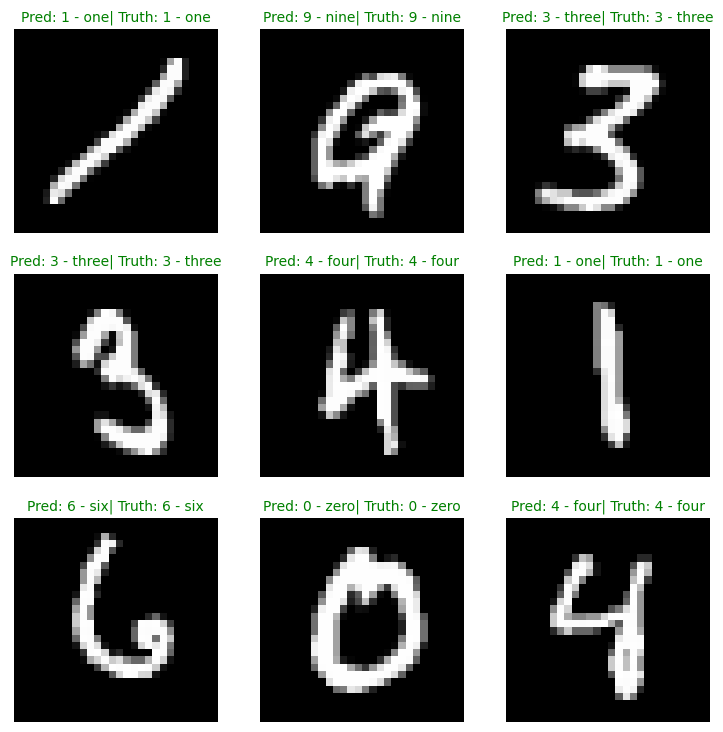

In [73]:
plt.figure(figsize=(9,9))
nrows, ncols = 3, 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    plt.imshow(sample.squeeze(), cmap='gray')

    pred_label = class_names[pred_classes[i]]

    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label}| Truth: {truth_label}"

    if pred_label==truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [66]:
y_preds = []
pred_prob_lst = []
model_1.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions...'):
        X, y = X.to(device), y.to(device)

        preds = model1(X)
        pred_prob_lst.append(preds)
        y_pred = torch.softmax(preds.squeeze(), dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())

y_preds_all = torch.cat(y_preds)
y_preds_all

Making predictions...: 100%|██████████| 313/313 [00:03<00:00, 88.03it/s] 


tensor([4, 1, 9,  ..., 4, 1, 9])

In [68]:
# torch.cat(torch.tensor([1,2,3,2]))
# pred_prob_lst

In [80]:
pred_probs = make_predictions(model1, test_data, device)
len(pred_probs)

10000

In [36]:
# !pip install torchmetrics
# try:
#     import torchmetrics, mlxtend
#     print(f"The version of mlxtend: {mlxtend.__version__}")
#     assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 19 or higher"
# except:
#     !pip install -q torchmetrics -U mlxtend
#     import torchmetrics, mlxtend
#     print(f"The version of mlxtend: {mlxtend.__version__}")

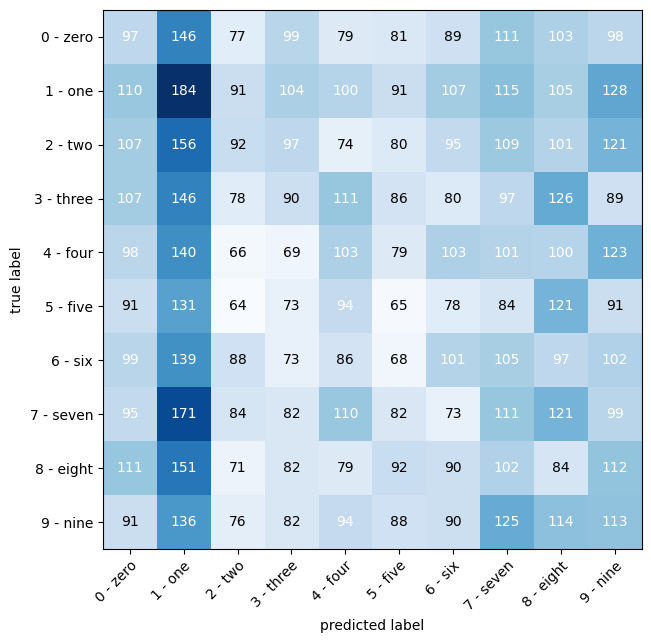

In [77]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds_all,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

In [133]:
from sklearn import metrics
import seaborn as sns
from torchmetrics import AUROC, Accuracy
print(metrics.classification_report(test_data.targets, y_preds_all))
auroc = AUROC(task='multiclass', num_classes=10)
print(auroc(pred_probs, test_data.targets))
acc_fn = Accuracy(task='multiclass', num_classes=10)
print(acc_fn(y_preds_all, test_data.targets))

              precision    recall  f1-score   support

           0       0.10      0.10      0.10       980
           1       0.12      0.16      0.14      1135
           2       0.12      0.09      0.10      1032
           3       0.11      0.09      0.10      1010
           4       0.11      0.10      0.11       982
           5       0.08      0.07      0.08       892
           6       0.11      0.11      0.11       958
           7       0.10      0.11      0.11      1028
           8       0.08      0.09      0.08       974
           9       0.11      0.11      0.11      1009

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000

tensor(0.9999)
tensor(0.1040)


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [130]:
random_img = torch.randn(size=(1,3,64,64))
conv_block = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=4, stride=1, padding=1)

In [131]:
conv_block(random_img).shape

torch.Size([1, 10, 63, 63])